# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [2]:
# OpenWeatherMap API Key
weather_api_key = "ad1f9c56500df0fd508ed416f7243eab"


### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 614


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities with a time delay of 1 second
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

        # Add a 1-second time delay between API calls to avoid rate limiting
        time.sleep(1)

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hermanus
Processing Record 2 of Set 1 | wanaka
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | parker
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | hasaki


In [ ]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          547
Lat           547
Lng           547
Max Temp      547
Humidity      547
Cloudiness    547
Wind Speed    547
Country       547
Date          547
dtype: int64

In [ ]:
# Display sample data
print (city_data_df)

                City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0            sorland  67.6670   12.6934    290.07        82           0   
1              buzim  45.0547   16.0319    302.19        49          81   
2            rikitea -23.1203 -134.9692    294.73        65          76   
3           klaksvik  62.2266   -6.5890    286.66        88          91   
4             albany  42.6001  -73.9662    294.91        62           4   
..               ...      ...       ...       ...       ...         ...   
542         benghazi  32.1167   20.0667    301.98        68           0   
543     shakhovskaya  56.0283   35.5097    296.88        66          37   
544  punta de bombon -17.1717  -71.7931    291.32        79          74   
545        sasolburg -26.8136   27.8170    288.78        20           0   
546          bacolod  10.6667  122.9500    299.26        86          79   

     Wind Speed Country        Date  
0          6.69      NO  1690901353  
1          3.84      BA

In [ ]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [ ]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sorland,67.6670,12.6934,290.07,82,0,6.69,NO,1690901353
1,buzim,45.0547,16.0319,302.19,49,81,3.84,BA,1690901354
2,rikitea,-23.1203,-134.9692,294.73,65,76,8.63,PF,1690901355
3,klaksvik,62.2266,-6.5890,286.66,88,91,6.56,FO,1690901356
4,albany,42.6001,-73.9662,294.91,62,4,0.45,US,1690901182


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

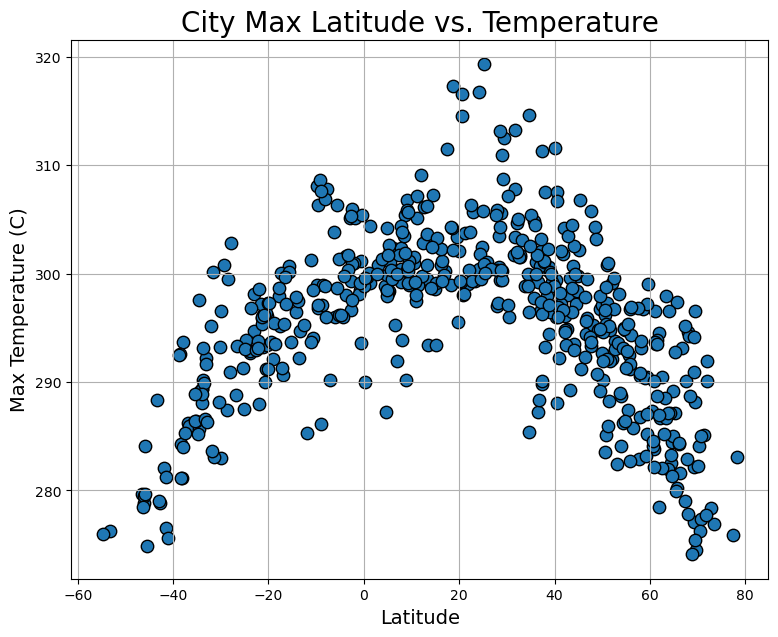

In [ ]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(9,7))
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker='o', edgecolors='black', s=80)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature", fontsize=20)
plt.ylabel("Max Temperature (C)", fontsize=14)
plt.xlabel("Latitude", fontsize=14)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

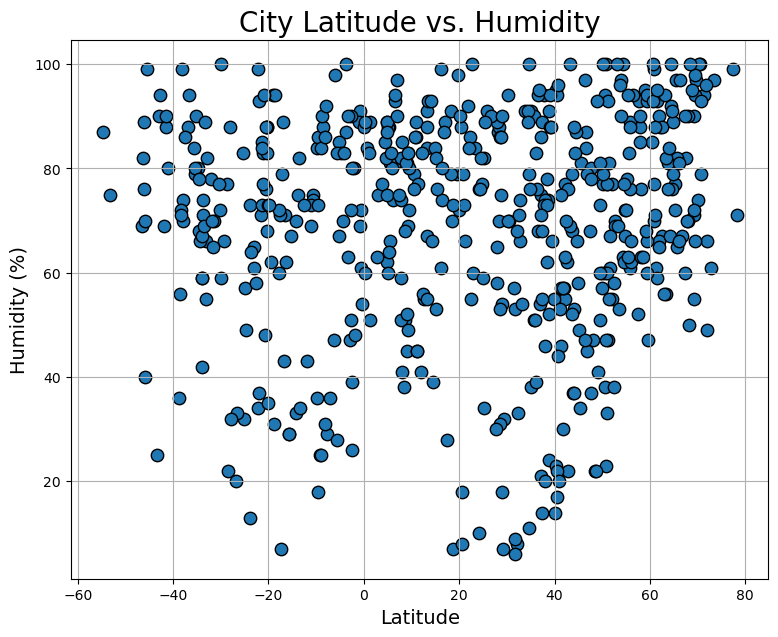

In [ ]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(9,7))
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker='o', edgecolors='black', s=80)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity", fontsize=20)
plt.ylabel("Humidity (%)", fontsize=14)
plt.xlabel("Latitude", fontsize=14)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

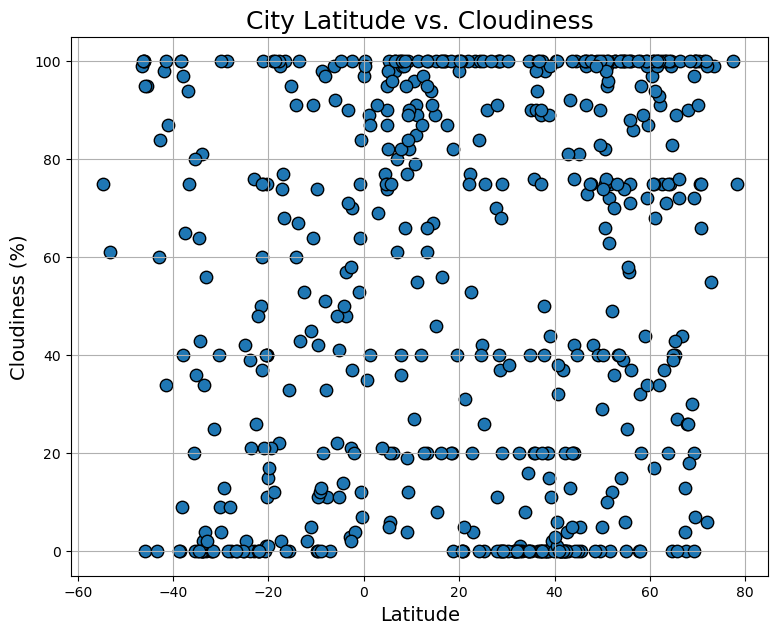

In [ ]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(9,7))
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker='o', edgecolors='black', s=80)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness", fontsize=18)
plt.ylabel("Cloudiness (%)", fontsize=14)
plt.xlabel("Latitude", fontsize=14)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

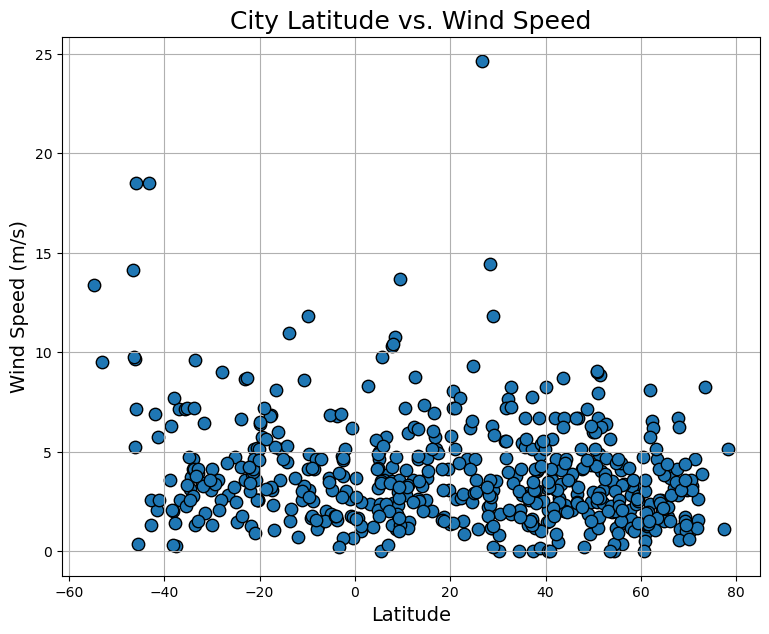

In [ ]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(9,7))
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker='o', edgecolors='black', s=80)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed", fontsize=18)
plt.ylabel("Wind Speed (m/s)", fontsize=14)
plt.xlabel("Latitude", fontsize=14)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
def lin_regress_plot_fn(x_values, y_values):
    # perform a linear regression on y vs. x
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # get regression values
    regress_values = x_values * slope + intercept

    # create plot
    plt.figure(figsize=(9,7))
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")

    return slope, intercept, rvalue, pvalue, stderr

In [ ]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sorland,67.6670,12.6934,290.07,82,0,6.69,NO,1690901353
1,buzim,45.0547,16.0319,302.19,49,81,3.84,BA,1690901354
3,klaksvik,62.2266,-6.5890,286.66,88,91,6.56,FO,1690901356
4,albany,42.6001,-73.9662,294.91,62,4,0.45,US,1690901182
5,lagos,6.5833,3.7500,300.33,93,100,3.85,NG,1690901255


In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,rikitea,-23.1203,-134.9692,294.73,65,76,8.63,PF,1690901355
7,busselton,-33.6500,115.3333,290.20,71,2,9.62,AU,1690901361
8,hithadhoo,-0.6000,73.0833,301.21,72,12,2.65,MV,1690901363
10,punta arenas,-53.1500,-70.9167,276.29,75,61,9.51,CL,1690901366
11,inhambane,-23.8650,35.3833,292.72,73,39,6.63,MZ,1690901367


###  Temperature vs. Latitude Linear Regression Plot

TypeError: Got both 'fontsize' and 'size', which are aliases of one another

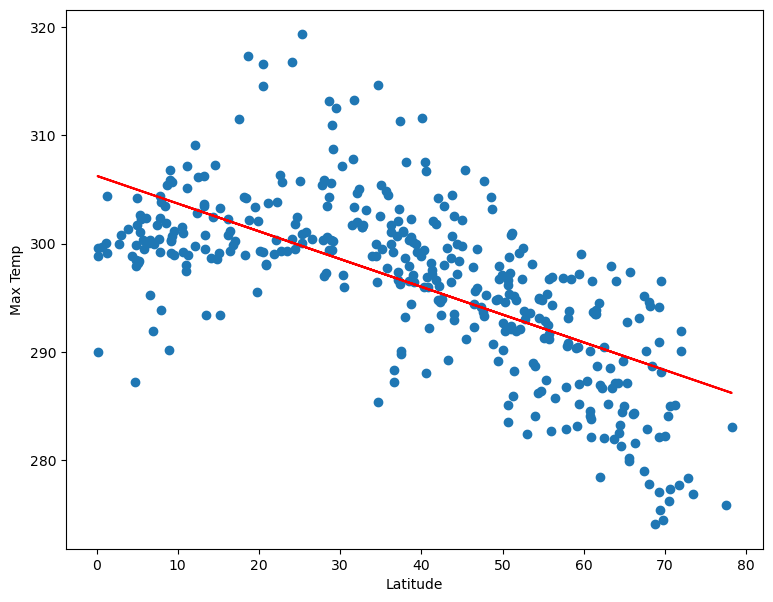

In [ ]:
# Linear regression on Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = lin_regress_plot_fn(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(40,30),fontsize=15,color="red", size=22)

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

TypeError: Got both 'fontsize' and 'size', which are aliases of one another

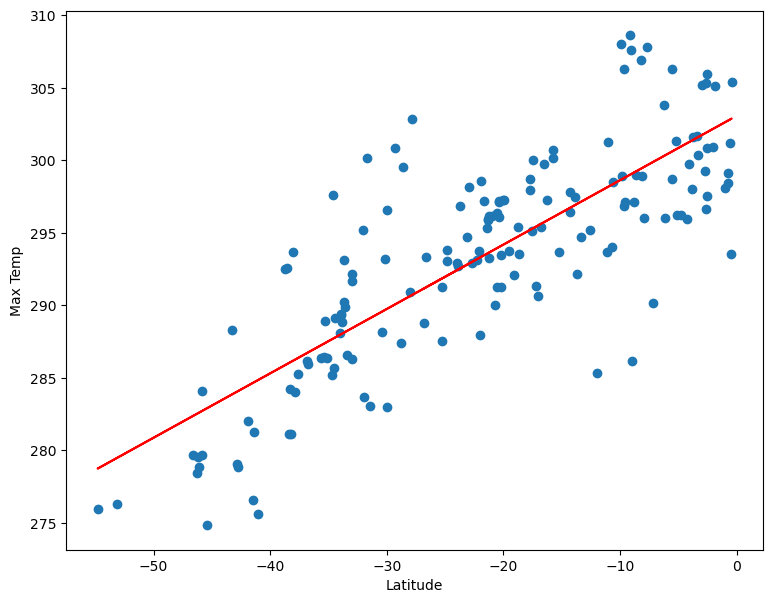

In [ ]:
# Linear regression on Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = lin_regress_plot_fn(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(-53,30),fontsize=15,color="red", size=22)

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** The analysis reveals a weak positive correlation between latitude and maximum temperature in the southern hemisphere, while a strong negative correlation exists in the northern hemisphere. This suggests that latitude significantly influences the maximum temperature above the equator but has a weaker effect in the southern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

TypeError: Got both 'fontsize' and 'size', which are aliases of one another

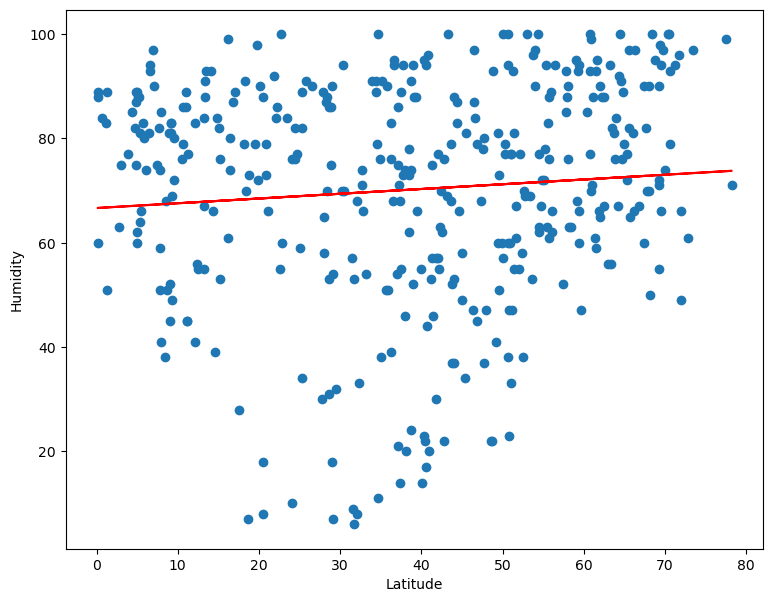

In [ ]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = lin_regress_plot_fn(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(45,5),fontsize=15,color="red", size=22)

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

TypeError: Got both 'fontsize' and 'size', which are aliases of one another

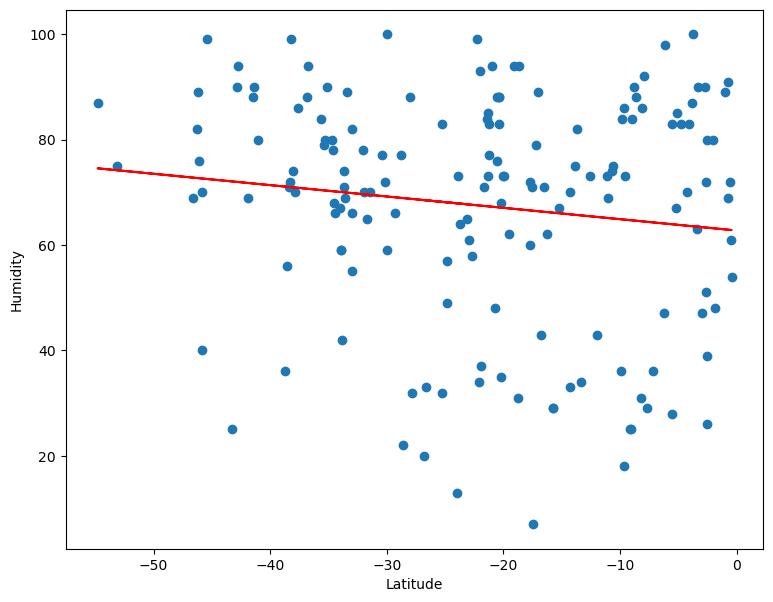

In [ ]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = lin_regress_plot_fn(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(-25,20),fontsize=15,color="red", size=22)

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** In both hemispheres, there is a slightly positive and weak correlation between humidity and latitude. However, the correlation's statistical significance is unclear, as it may not have a substantial practical meaning or impact on the relationship between humidity and latitude.

### Cloudiness vs. Latitude Linear Regression Plot

TypeError: Got both 'fontsize' and 'size', which are aliases of one another

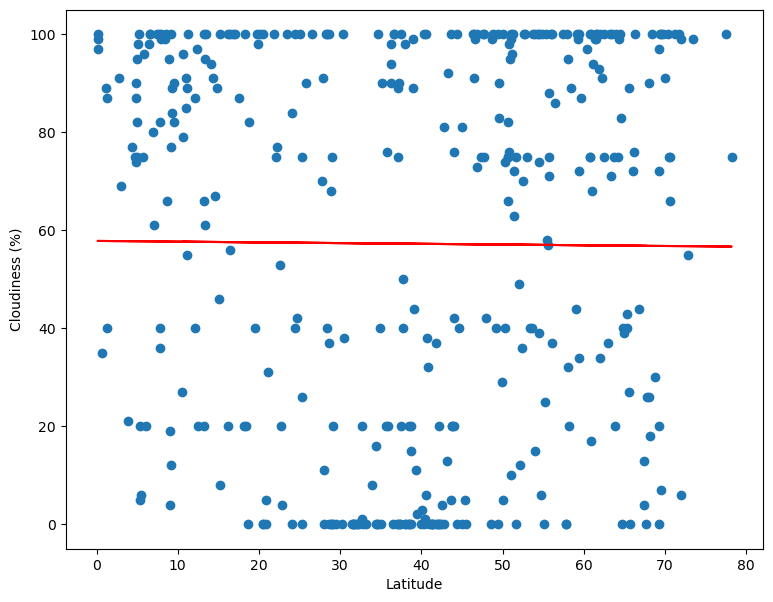

In [ ]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = lin_regress_plot_fn(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq,(11,63),fontsize=15,color="red", size=22)

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

TypeError: Got both 'fontsize' and 'size', which are aliases of one another

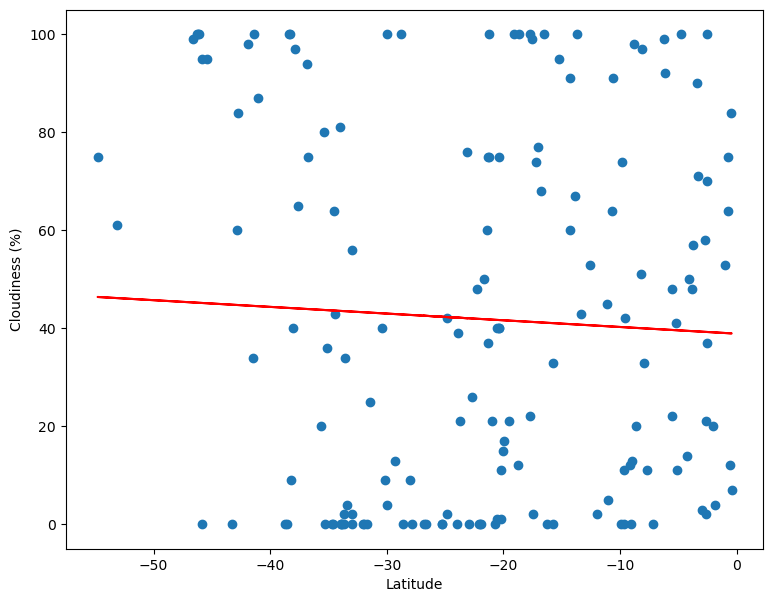

In [ ]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = lin_regress_plot_fn(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq,(-55,10),fontsize=15,color="red", size=22)

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** The analysis indicates that, like the findings for latitude and humidity, there is no statistically significant correlation between the data represented on the x and y axes. The absence of a meaningful correlation suggests that the variables on the axes do not exhibit any significant relationship.

### Wind Speed vs. Latitude Linear Regression Plot

TypeError: Got both 'fontsize' and 'size', which are aliases of one another

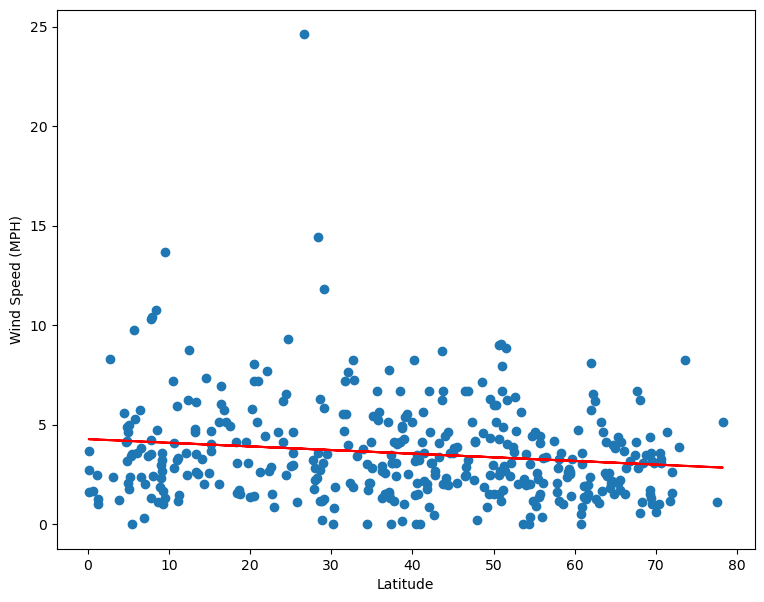

In [ ]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = lin_regress_plot_fn(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
plt.annotate(line_eq,(6,13),fontsize=15,color="red", size=22)

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

TypeError: Got both 'fontsize' and 'size', which are aliases of one another

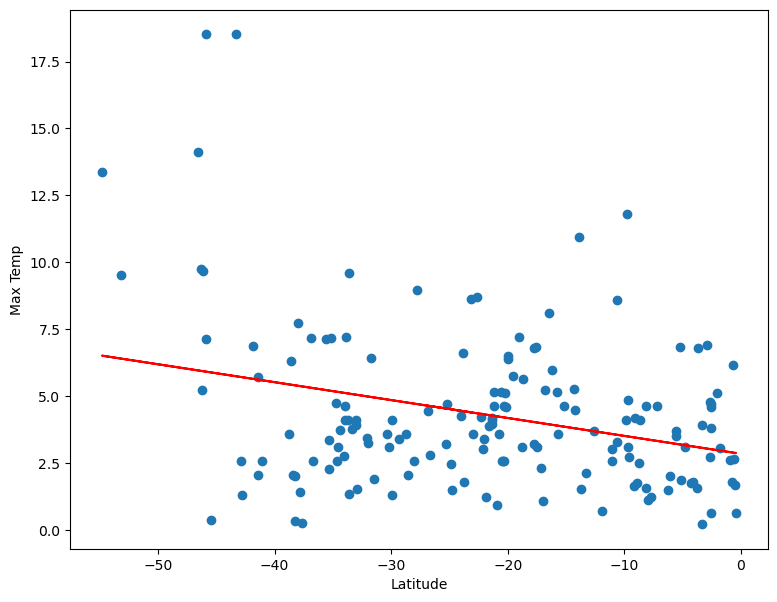

In [ ]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = lin_regress_plot_fn(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(-22,9),fontsize=15,color="red", size=22)

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** The examination of wind speed and latitude data reveals no statistically meaningful correlation between the two variables. This suggests that latitude does not have a significant impact on wind speed, and the two variables are likely not related in a meaningful way.




